# Модель предпочтительного присоединения. Модель тесного мира Уотса-Строгатса. Случайные сети.

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.extended_barabasi_albert_graph.html
* Дополнительные источники:
    * https://barabasi.com/f/623.pdf

## Вопросы для совместного обсуждения

1\. Обсудите модель предпочтительного присоединения

2\. Обсудите модель тесного мира Уотса-Строгатса

3\. Обсудите конфигурационную модель и модель случайного геометрического графа

## Задачи для самостоятельного решения

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

<p class="task" id="1"></p>

1\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` > 50. Визуализируйте полученный граф, сделайте размер и цвет узлов пропорциональными их степени. Постройте график выборочной функции распределения степеней узлов для сети.

- [ ] Проверено на семинаре

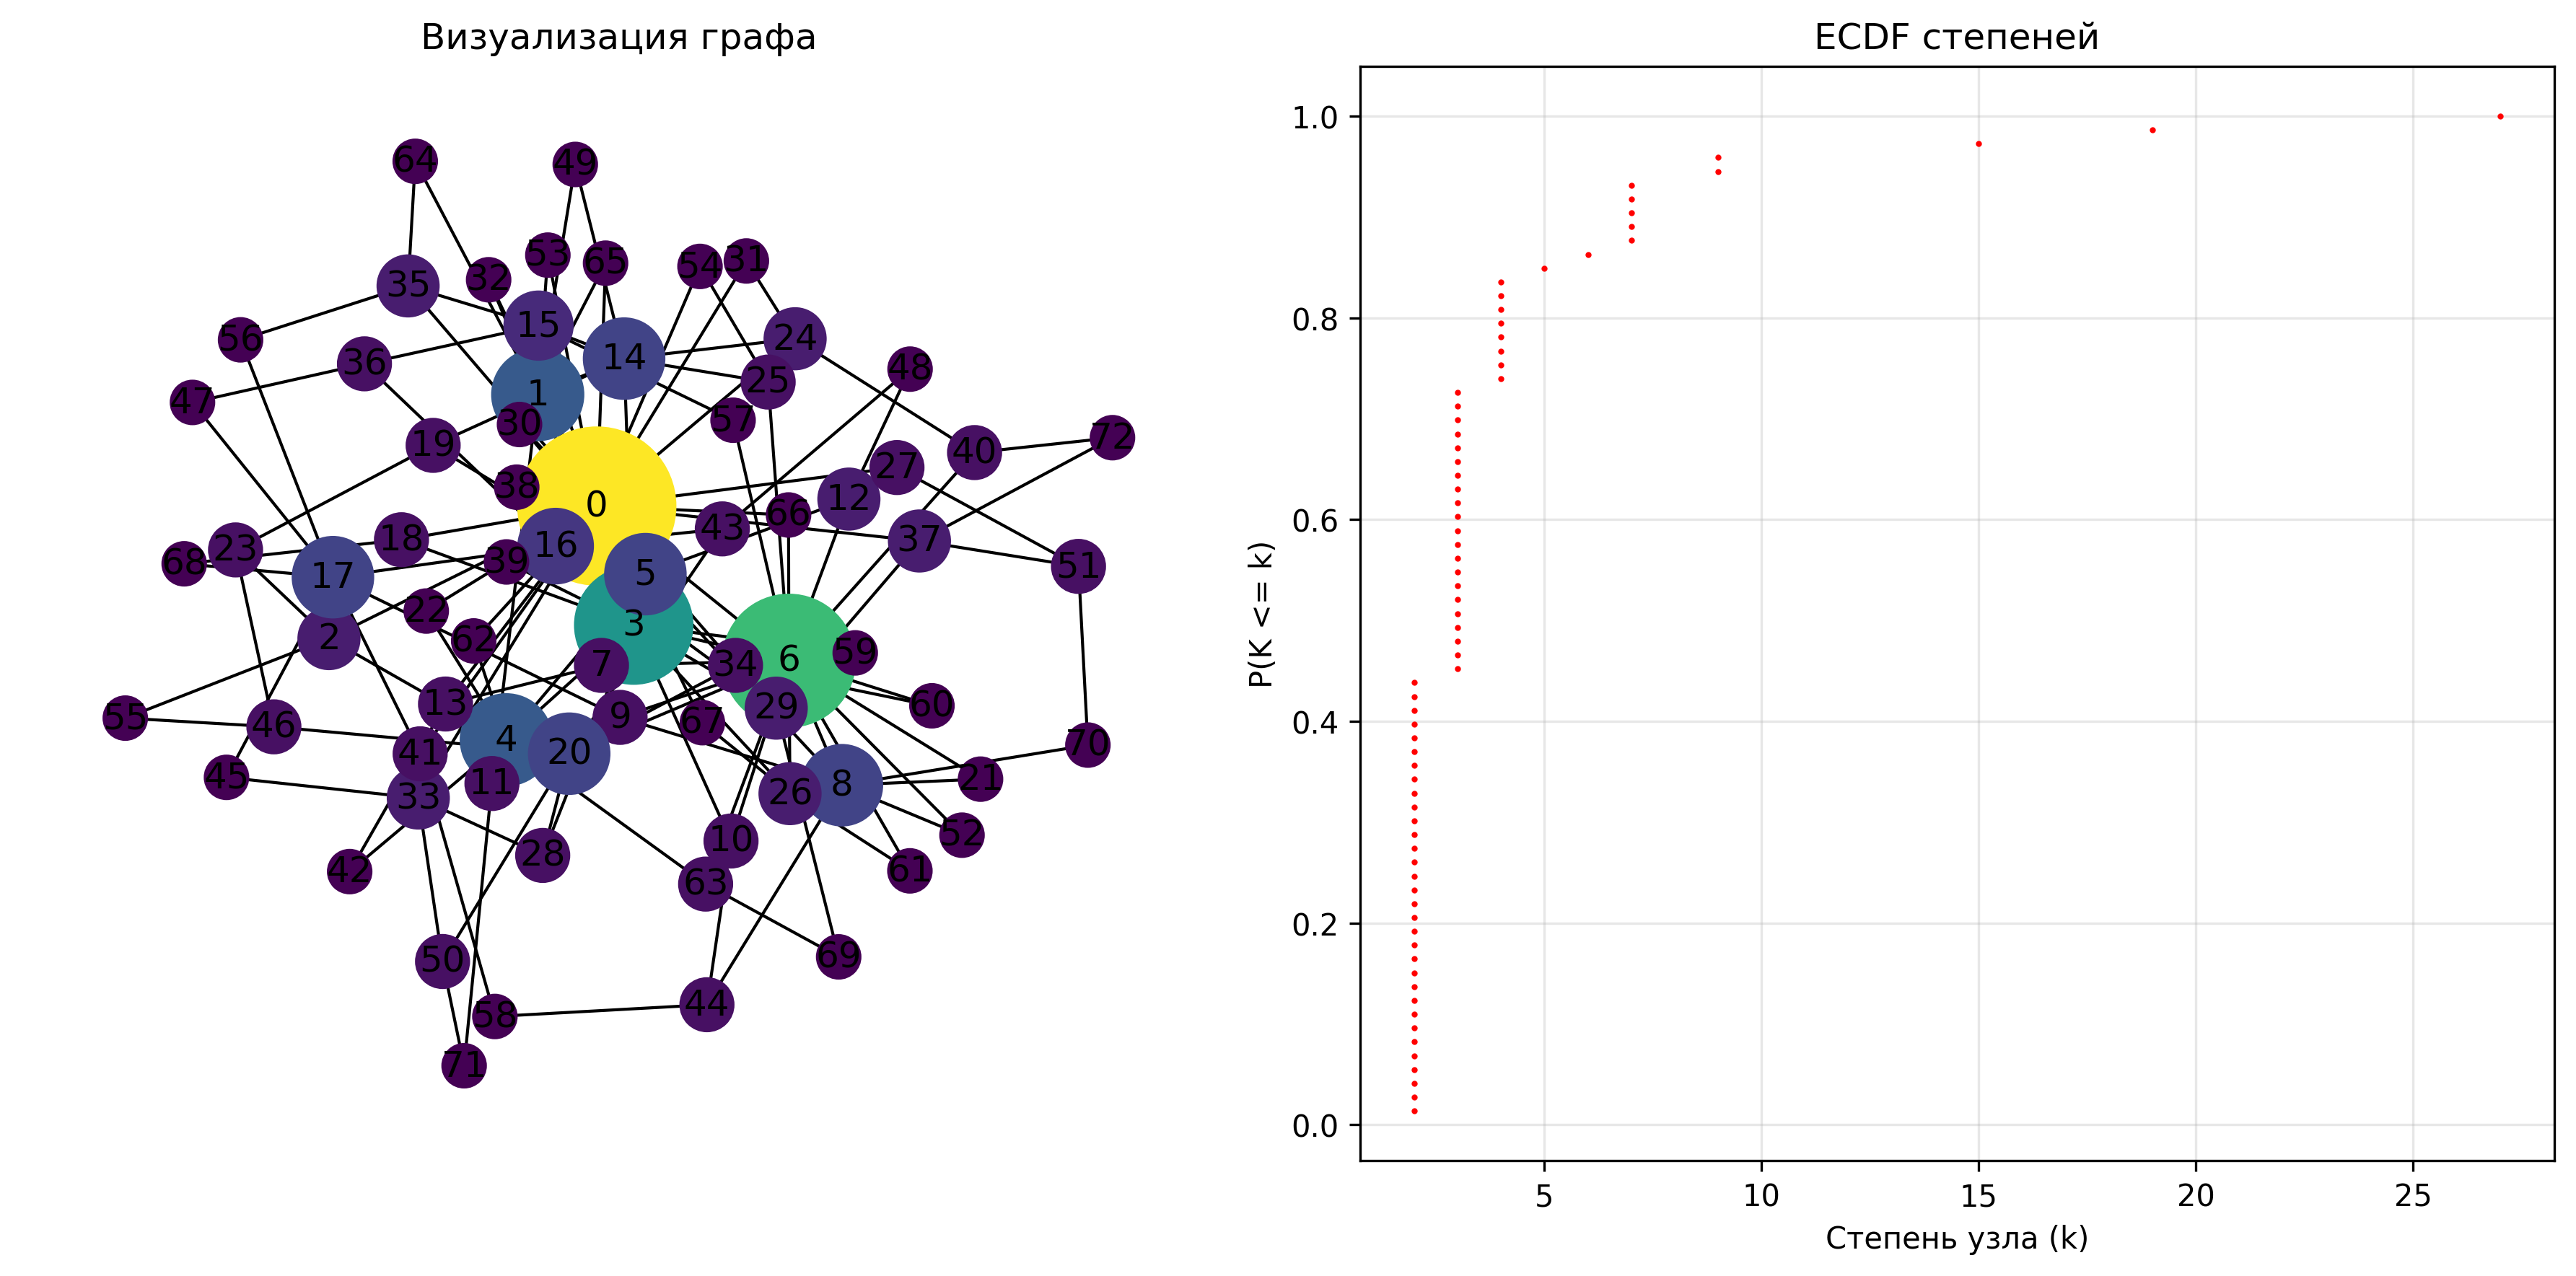

In [2]:
G = nx.barabasi_albert_graph(73,2)
node_sizes = []
node_colors =[]
for node in G.nodes():
    node_sizes.append(G.degree(node) * 100)
    node_colors.append(G.degree(node)*2)

def get_ecdf_coords(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n + 1) / n
    return x, y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
nx.draw(G, ax=ax1, node_color=node_colors, node_size=node_sizes, with_labels=True)
ax1.set_title("Визуализация графа")


x_out, y_out = get_ecdf_coords(list(dict(G.degree).values()))
ax2.plot(x_out, y_out, marker='.', linestyle='none', color='r', markersize=2)
ax2.set_title("ECDF степеней")
ax2.set_xlabel("Степень узла (k)")
ax2.set_ylabel("P(K <= k)")
ax2.grid(True, alpha=0.3)

plt.tight_layout() 
plt.show()

<p class="task" id="2"></p>

2\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n=10000`. Визуализируйте закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат. 

- [ ] Проверено на семинаре

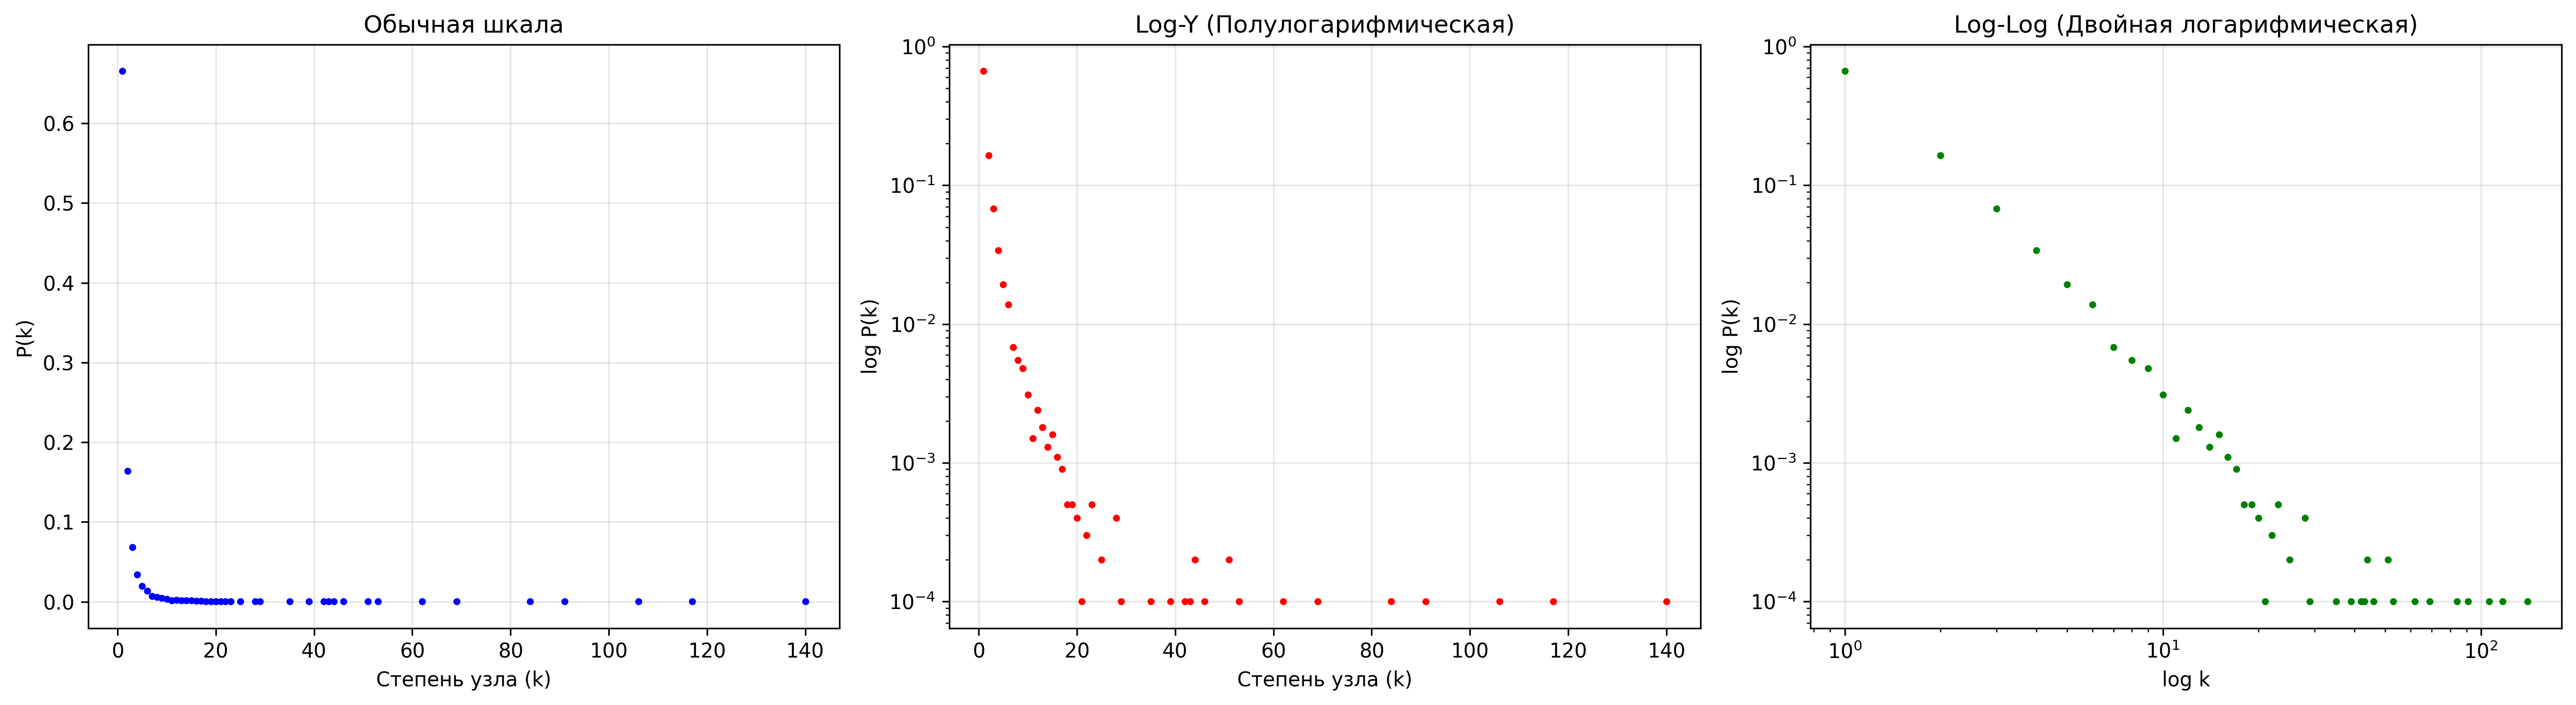

In [3]:
n = 10000
m=1
G = nx.barabasi_albert_graph(n, m)

degrees = list(dict(G.degree).values())
degree_counts = Counter(degrees)
x = sorted(degree_counts.keys())
y = [degree_counts[k] / n for k in x]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5),dpi=300)

ax1.plot(x, y, 'b.', markersize=5)
ax1.set_title("Обычная шкала")
ax1.set_xlabel("Степень узла (k)")
ax1.set_ylabel("P(k)")
ax1.grid(True, alpha=0.3)

ax2.semilogy(x, y, 'r.', markersize=5)
ax2.set_title("Log-Y (Полулогарифмическая)")
ax2.set_xlabel("Степень узла (k)")
ax2.set_ylabel("log P(k)")
ax2.grid(True, alpha=0.3)

ax3.loglog(x, y, 'g.', markersize=5)
ax3.set_title("Log-Log (Двойная логарифмическая)")
ax3.set_xlabel("log k")
ax3.set_ylabel("log P(k)")
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Визуализируйте закон распределения степеней узлов с использованием log-binning для сети из предыдущего задания. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

- [ ] Проверено на семинаре

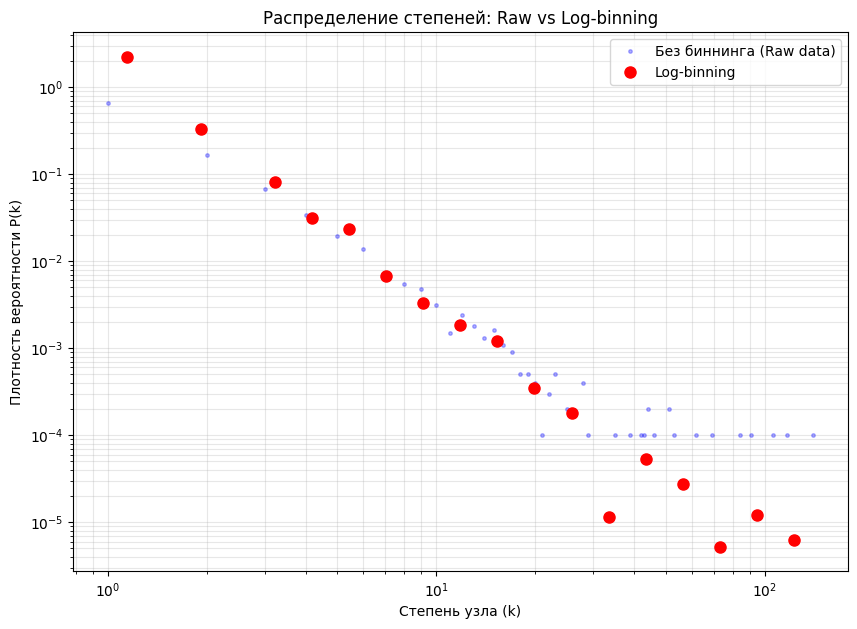

In [4]:
bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=20)
density, bin_edges = np.histogram(degrees, bins=bins, density=True)

bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
x_binned = bin_centers[density > 0]
y_binned = density[density > 0]

plt.figure(figsize=(10, 7))
plt.loglog(x, y, 'b.', alpha=0.3, markersize=5, label='Без биннинга (Raw data)')

plt.loglog(x_binned, y_binned, 'ro', markersize=8, label='Log-binning')
plt.title("Распределение степеней: Raw vs Log-binning")
plt.xlabel("Степень узла (k)")
plt.ylabel("Плотность вероятности P(k)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)

plt.show()

<p class="task" id="4"></p>

4\.  C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте сети с кол-вом узлов порядка 1000 и с разным p. В качестве `p` рассмотрите несколько значений, равномерно распределенных по логарифмической шкале на отрезке $[10^{-4}, 1]$. 

Визуализируйте результаты пересвязывания, построив на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания. Обозначьте точки разных графиков различными маркерами и цветами. Добавьте легенду.

- [ ] Проверено на семинаре

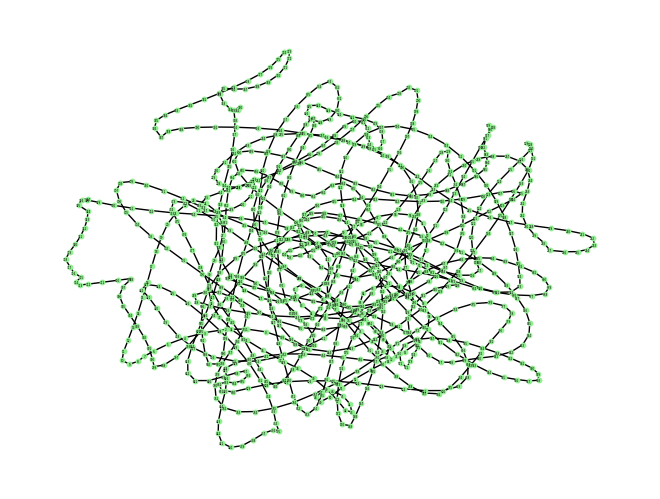

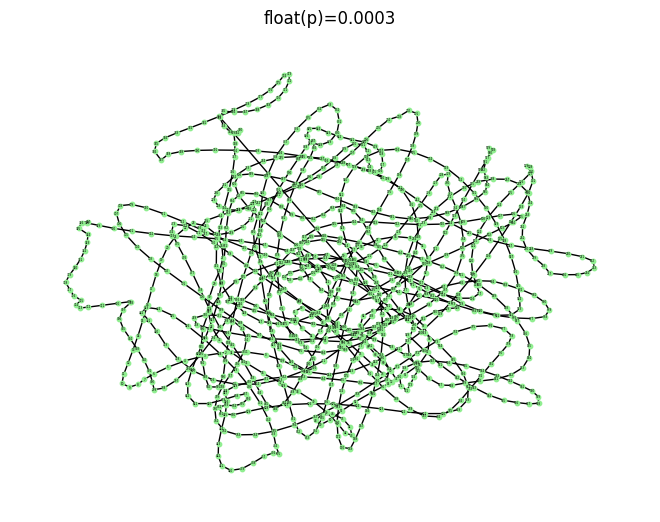

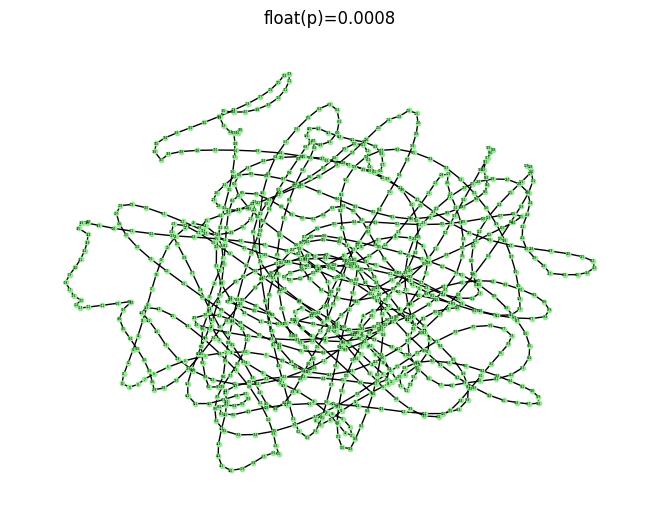

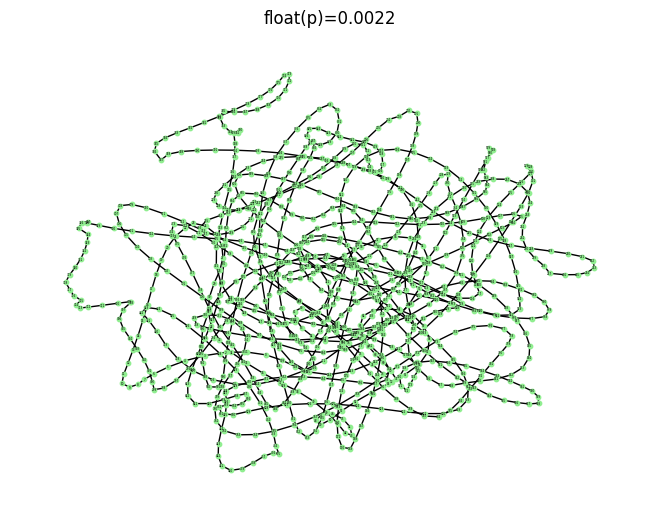

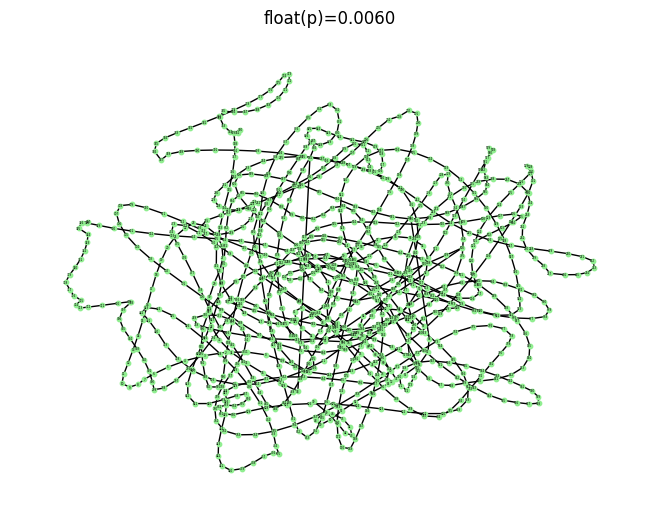

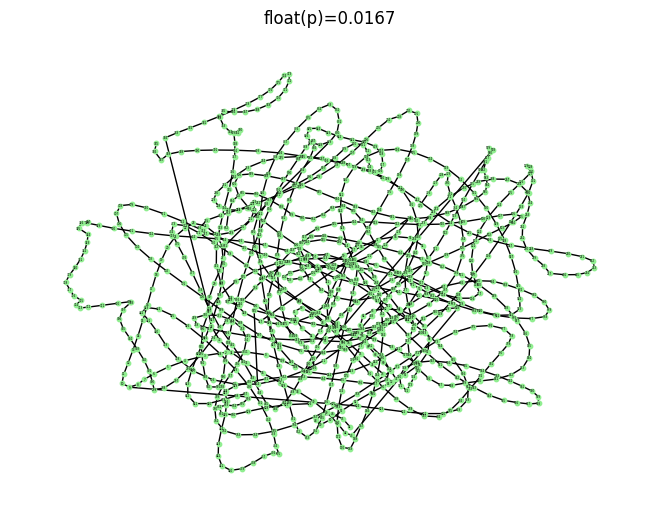

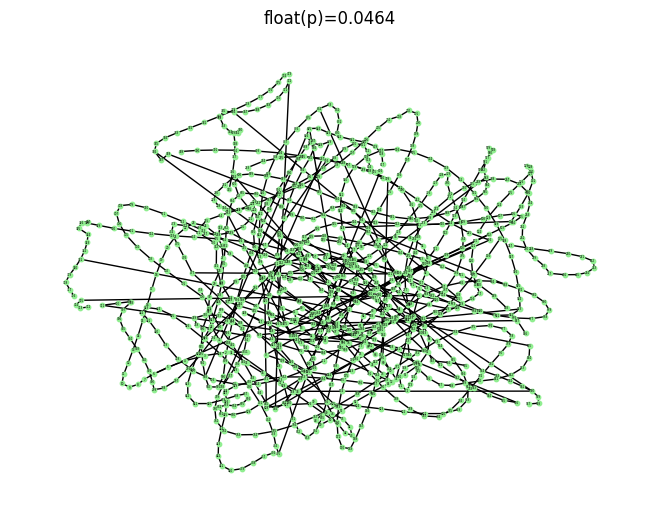

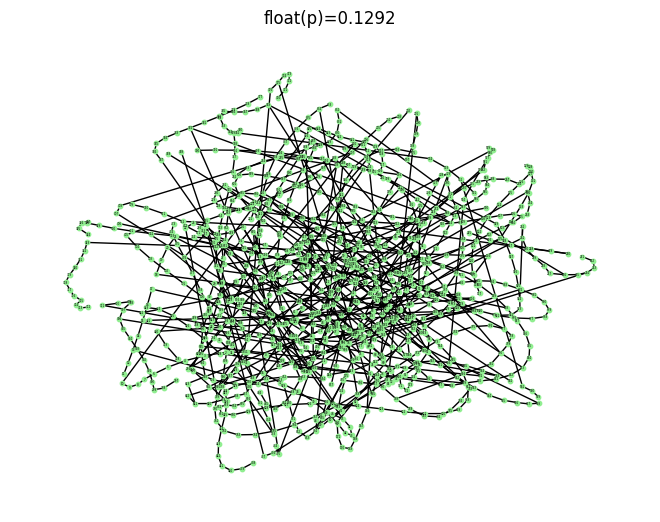

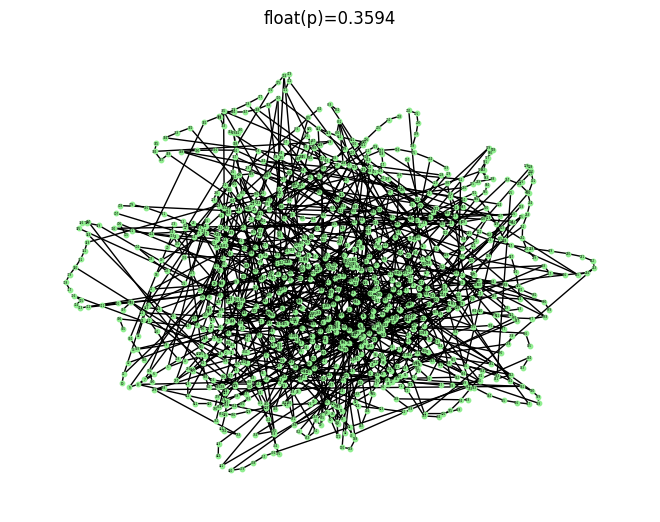

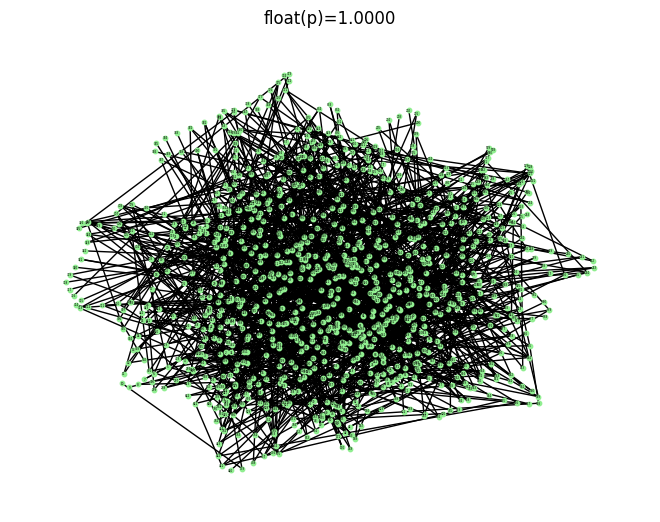

In [17]:
G = nx.watts_strogatz_graph(1000, 2, 1e-4)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=10, node_color='lightgreen', font_size=2)
plt.show()
for p in np.logspace(-4, 0, 10)[1:]:
    G = nx.watts_strogatz_graph(1000, 2, p)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color='lightgreen', font_size=2)
    plt.title(f'{float(p)=:.4f}')
    plt.show()

<p class="task" id="5"></p>

5\. Создайте неориентированный граф на основе набора данных fb-pages-food с сайта https://networkrepository.com/ . C помощью `nx.configuration_model` постройте рандомизированный аналог данной сети. Визуализируйте исходный и рандомизированный граф рядом. Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

- [ ] Проверено на семинаре

In [28]:
G = nx.read_edgelist('data/fb-pages-food/fb-pages-food.edges', delimiter=',', nodetype=int)
G.is_directed()

False

In [29]:
G_copy = nx.configuration_model(list(dict(G.degree).values()))

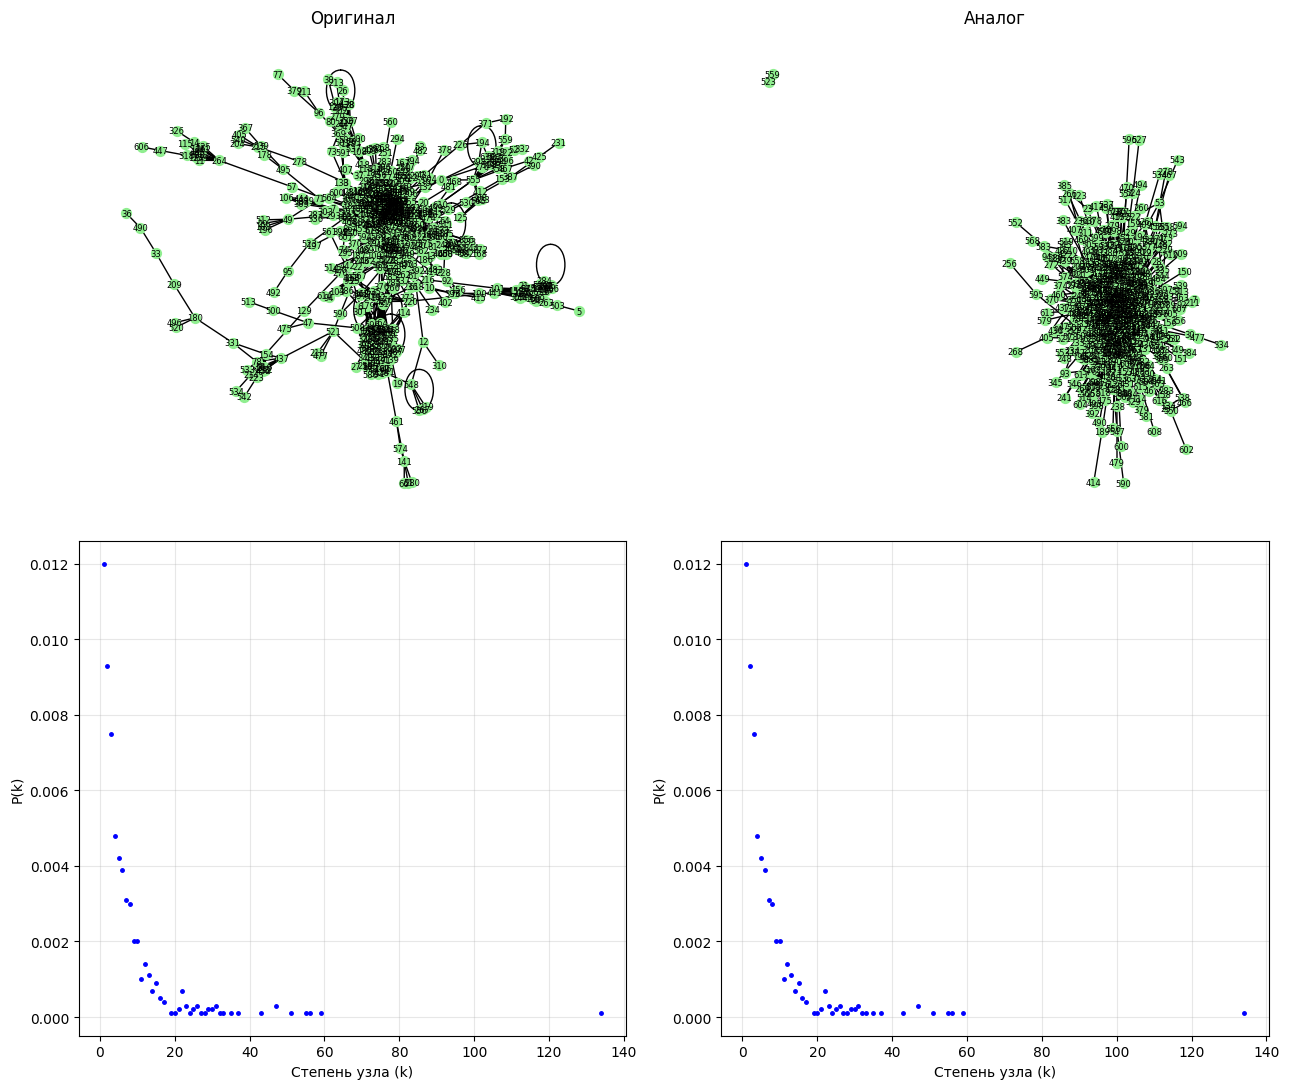

In [40]:
fig, ax = plt.subplots(2,2, figsize=(13,11), dpi=100)
ax = ax.flatten()
nx.draw(G,ax=ax[0],with_labels=True, node_size=50, node_color='lightgreen', font_size=6)
ax[0].set_title('Оригинал')

nx.draw(G_copy, ax=ax[1],with_labels=True, node_size=50, node_color='lightgreen', font_size=6)
ax[1].set_title('Аналог')

degrees = list(dict(G.degree).values())
degree_counts = Counter(degrees)
x = sorted(degree_counts.keys())
y = [degree_counts[k] / n for k in x]

ax[2].plot(x, y, 'b.', markersize=5)
ax[2].set_xlabel("Степень узла (k)")
ax[2].set_ylabel("P(k)")
ax[2].grid(True, alpha=0.3)

degrees = list(dict(G_copy.degree).values())
degree_counts = Counter(degrees)
x = sorted(degree_counts.keys())
y = [degree_counts[k] / n for k in x]

ax[3].plot(x, y, 'b.', markersize=5)
ax[3].set_xlabel("Степень узла (k)")
ax[3].set_ylabel("P(k)")
ax[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Распределения степеней одинаковые

<p class="task" id="6"></p>

6\. C помощью реализации алгоритма постоения случайного геометрического графа из `networkx` сгенерируйте сеть с кол-вом узлов порядка 500 при радиусе `r=0.2` и $L^2$ метрикой для вычисления расстояния. Визуализируйте полученный граф, уменьшив размер узлов и сделав цвет ребер черным прозрачным (используйте RGBA). Визуализируйте распределение степеней узлов полученного графа. 

Повторите решение задачи, использовав $L^1$ метрику для вычисления расстояния. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

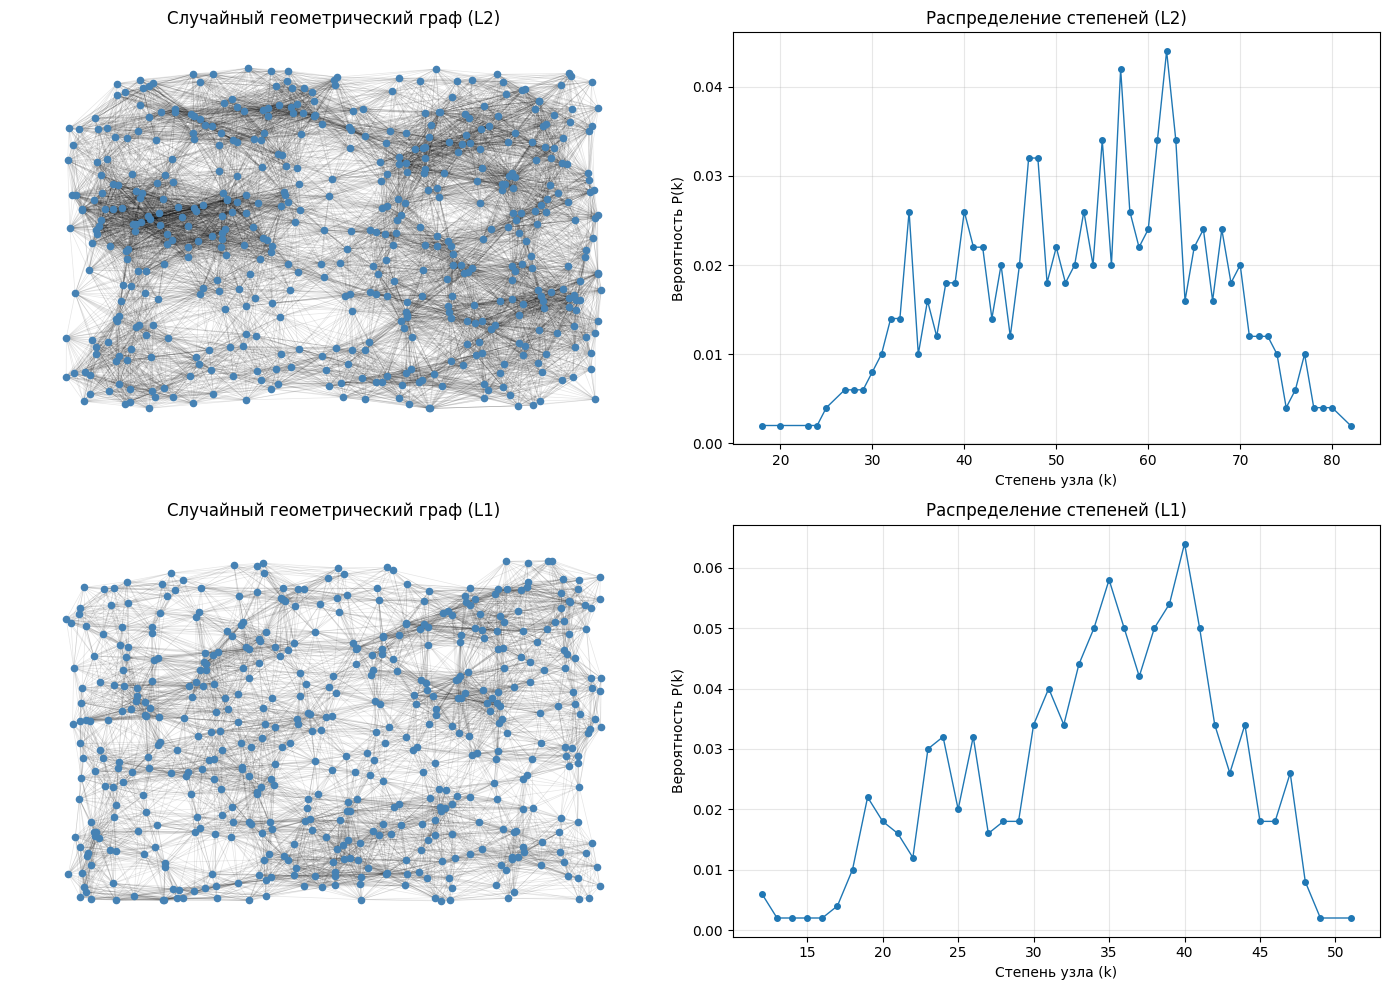

Средняя степень (L2): 53.05
Средняя степень (L1): 34.05


In [42]:
n = 500
radius = 0.2
dim = 2

def plot_geometric_graph(G, title_suffix, ax_graph, ax_hist):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos=pos, ax=ax_graph, 
            node_size=20, 
            edge_color=(0, 0, 0, 0.1), 
            node_color='steelblue',
            width=0.5)
    ax_graph.set_title(f"Случайный геометрический граф ({title_suffix})")
    ax_graph.axis('off')

    degrees = [d for n, d in G.degree()]
    degree_counts = Counter(degrees)
    
    x = sorted(degree_counts.keys())
    y = [degree_counts[k] / n for k in x]
    
    ax_hist.plot(x, y, 'o-', markersize=4, linewidth=1)
    ax_hist.set_title(f"Распределение степеней ({title_suffix})")
    ax_hist.set_xlabel("Степень узла (k)")
    ax_hist.set_ylabel("Вероятность P(k)")
    ax_hist.grid(True, alpha=0.3)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

G_l2 = nx.random_geometric_graph(n, radius, p=2)
plot_geometric_graph(G_l2, "L2", axs[0, 0], axs[0, 1])

G_l1 = nx.random_geometric_graph(n, radius, p=1)
plot_geometric_graph(G_l1, "L1", axs[1, 0], axs[1, 1])

plt.tight_layout()
plt.show()

avg_degree_l2 = np.mean([d for n, d in G_l2.degree()])
avg_degree_l1 = np.mean([d for n, d in G_l1.degree()])

print(f"Средняя степень (L2): {avg_degree_l2:.2f}")
print(f"Средняя степень (L1): {avg_degree_l1:.2f}")